In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier

In [3]:
#df['Property_Area'].replace({'Urban':1,'Semiurban':2,'Rural':3})

In [4]:
te_df = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [5]:
tr_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

## On the basis of historicl data bank want to identify all the bad customer so that they won'y give loan to any bad customer

## Bad Cust - After onboarding customer who is not paying the load on the time.

In [6]:
tr_df.shape

(614, 13)

In [7]:
te_df.shape

(367, 12)

In [8]:
tr_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
te_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [10]:
te_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [11]:
tr_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
tr_df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
tr_df['Credit_History'].value_counts(normalize = True)

Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64

In [15]:
null_cols = ['Credit_History',
'Self_Employed',
'LoanAmount',
'Dependents',
'Loan_Amount_Term',
'Gender','Married']

In [16]:
for col in null_cols:
    #print(f"{col}"):\n{tr_df[col].value_counts()}\n","-"*50)
    tr_df[col] = tr_df[col].fillna(tr_df[col].dropna().mode().values[0])
    

In [17]:
tr_df.isnull().sum().sort_values(ascending = True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
#tr_df['LoanAmount'].fillna(tr_df['LoanAmount'].mean())

In [19]:
num  =tr_df.select_dtypes('number').columns.to_list()

In [20]:
cat  =tr_df.select_dtypes('object').columns.to_list()

In [21]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [22]:
cat[-1]

'Loan_Status'

In [23]:
tr_df[cat[-1]].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [24]:
total = float(len(tr_df[cat[-1]]))

In [25]:
#tr_df['Loan_Status'] = tr_df['Loan_Status'].replace({'Y':1,'N':0})

In [26]:

num = tr_df.select_dtypes('number').columns.to_list()

cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  tr_df[num]
#categoric df
loan_cat = tr_df[cat]

In [27]:
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


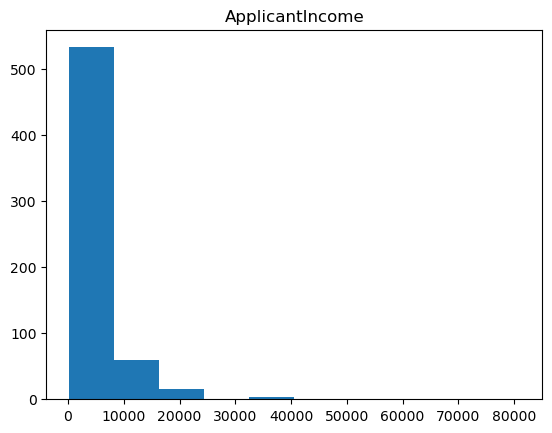

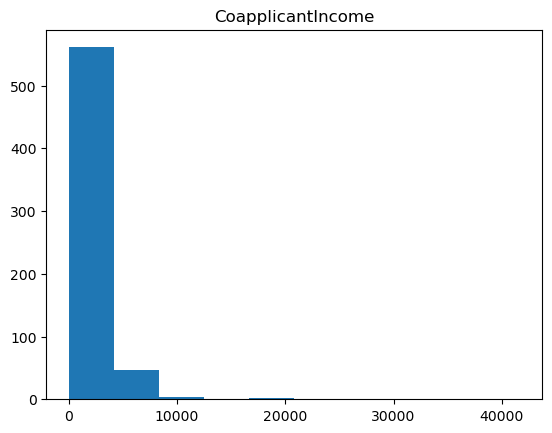

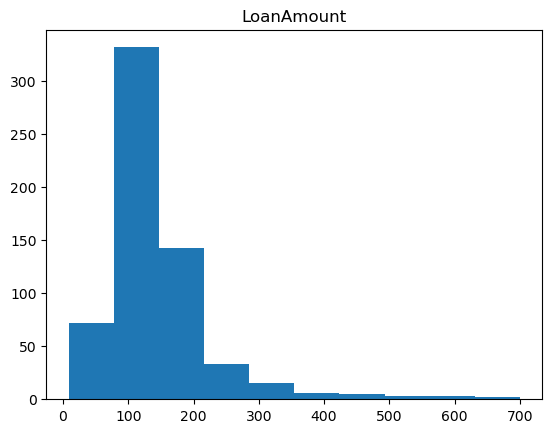

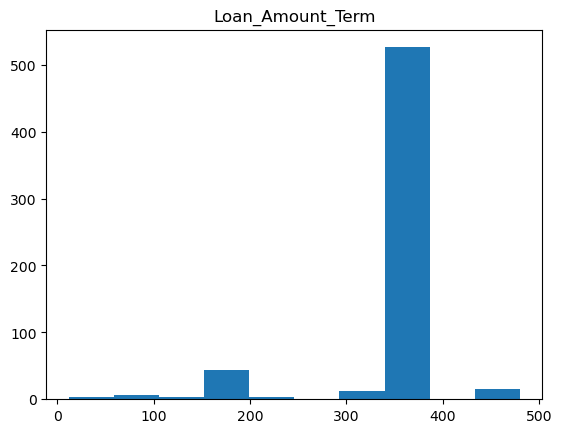

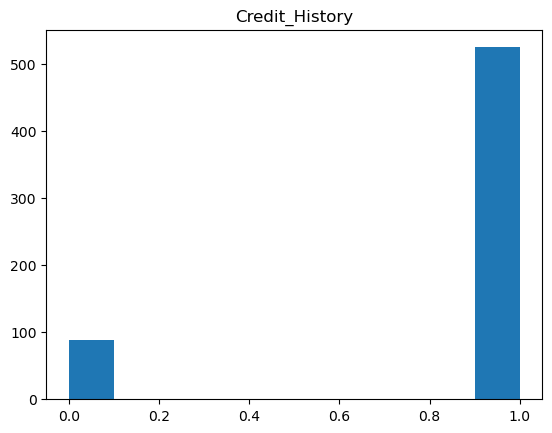

In [28]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()


## Encoding data to numeric data

In [29]:
to_numeric = {"Male":1,"Female":2,"Yes":1,"No":2,"Graduate":1,"Not Graduate":2,"Urban":3,"Semiurban":2,"Rural":1,"Y":1,"N":0,"3+":3}

In [38]:
tr_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,1,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [34]:
#tr_df['Gender'] = tr_df['Gender'].replace({"Male":1,"Female":2})

In [39]:
#tr_df['Married'] = tr_df['Married'].replace({"Yes":1,"No":2})

In [37]:
#tr_df['Education'] = tr_df['Education'].replace({"Graduate":1,"Not Graduate":2})

In [ ]:
#tr_df['Property_Area'] = tr_df['Property_Area'].replace({"Urban":3,"Semiurban":2,"Rural":1})

In [40]:
#tr_df['Loan_Status'] = tr_df['Loan_Status'].replace({"Y":1,"N":2})

In [41]:
#tr_df['Dependents'] = tr_df['Dependents'].replace({"3+":3})

In [46]:
tr_df.replace({"Male":1,"Female":2,"Yes":1,"No":2,"Graduate":1,"Not Graduate":2,"Urban":3,"Semiurban":2,"Rural":1,"Y":1,"N":0,"3+":3},inplace = True)

In [48]:
te_df.replace({"Male":1,"Female":2,"Yes":1,"No":2,"Graduate":1,"Not Graduate":2,"Urban":3,"Semiurban":2,"Rural":1,"Y":1,"N":0,"3+":3},inplace = True)

In [52]:
tr_df = tr_df.drop(columns = 'Loan_ID')

In [55]:
tr_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,2
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [53]:
tr_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.172914,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,0.017987
Married,0.364569,1.000000,-0.334216,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,0.091478
Dependents,-0.172914,-0.334216,1.000000,0.055752,-0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,-0.010118
Education,-0.045364,-0.012304,0.055752,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,0.085884
Self_Employed,-0.000525,0.004489,-0.056798,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,-0.003700
ApplicantIncome,-0.058809,-0.051708,0.118202,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,0.004710
CoapplicantIncome,-0.082912,-0.075948,0.030430,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,0.059187
LoanAmount,-0.106404,-0.146212,0.163017,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,0.031808
Loan_Amount_Term,0.074030,0.100912,-0.103864,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,0.022549
Credit_History,-0.009170,-0.010938,-0.040160,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,-0.540556


<Axes: >

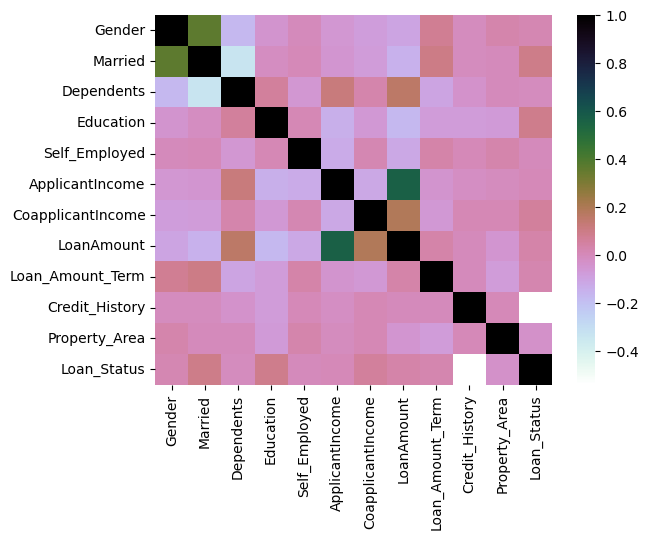

In [54]:
sns.heatmap(tr_df.corr(),cmap = 'cubehelix_r')

In [56]:
y = tr_df['Loan_Status']

In [59]:
X = tr_df.drop('Loan_Status',axis = 1)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [68]:
DT = DecisionTreeClassifier()

In [69]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_predict = DT.predict(X_test)

In [71]:
y_predict

array([2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [73]:
#classification_report(y_test,y_predict)

In [75]:
DT_SC = accuracy_score(y_test,y_predict)

In [77]:
print(f"{round(DT_SC*100,2)}% Accuracte")

70.81% Accuracte


In [78]:
pd.DataFrame({"y_test":y_test,'prediction':y_predict})

,y_test,prediction
454,1,2
52,2,1
536,1,1
469,2,2
55,1,1
...,...,...
242,1,2
515,1,1
582,1,1
225,2,1


In [79]:
confusion_matrix(y_test,y_predict)

array([[104,  30],
       [ 24,  27]], dtype=int64)

In [49]:
#tr_df = tr_df.applymap(lambda table: to_numeric.get(lable))